<a href="https://colab.research.google.com/github/Sanjayme049/ML/blob/main/Weather_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [34]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
data = pd.read_csv('/content/gdrive/My Drive/ML/ML_Weather_Dataset/weatherHistory.csv')

In [36]:
data


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [37]:
data.shape

(96453, 12)

In [38]:
data['Formatted Date'] = data['Formatted Date'].apply(lambda x: x.split('.')[0])
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])

In [39]:
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [40]:
data['Formatted Date']

0       2006-04-01 00:00:00
1       2006-04-01 01:00:00
2       2006-04-01 02:00:00
3       2006-04-01 03:00:00
4       2006-04-01 04:00:00
                ...        
96448   2016-09-09 19:00:00
96449   2016-09-09 20:00:00
96450   2016-09-09 21:00:00
96451   2016-09-09 22:00:00
96452   2016-09-09 23:00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns]

In [41]:
data.columns


Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

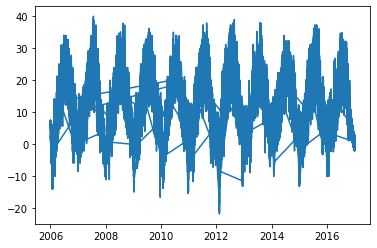

In [42]:
plt.plot(data['Formatted Date'], data['Temperature (C)'])

In [43]:
data.Summary.value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['summary'] = encoder.fit_transform(data.Summary)
data.drop('Summary', axis=1, inplace=True)

In [45]:
data['Precip Type'] = data['Precip Type'].map({'rain': 1, 'snow': 0})


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_features= 10)
tfidf_data = vec.fit_transform(data['Daily Summary']) 

In [47]:
tfidf_data.shape

(96453, 10)

In [48]:
tfidf_data = pd.DataFrame(tfidf_data.toarray(), columns = vec.get_feature_names_out())

In [49]:
tfidf_data.shape

(96453, 10)

In [50]:
data.drop('Daily Summary', axis=1, inplace=True)


In [51]:
ml_data = pd.concat([data, tfidf_data], axis=1)

In [52]:
# Converting the data to hours of the day and month

ml_data['day_or_night'] = ml_data['Formatted Date'].apply(lambda x: 'day' if (x.hour>6) & (x.hour<18) else 'night')

In [54]:
import calendar
ml_data['month_name'] = ml_data['Formatted Date'].apply(lambda x: calendar.month_abbr[x.month])

In [62]:
ml_data.drop(['Formatted Date', 'Loud Cover'], axis=1, inplace=True)

In [63]:
ml_data_dummy = pd.get_dummies(ml_data, drop_first= True)

In [64]:
ml_data.columns

Index(['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'summary', 'cloudy', 'day',
       'in', 'morning', 'mostly', 'partly', 'starting', 'the', 'throughout',
       'until', 'day_or_night', 'month_name'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


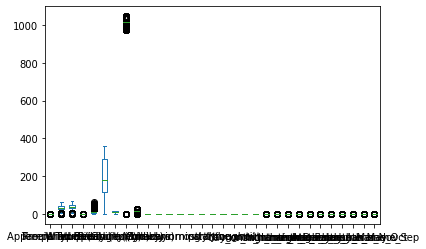

In [70]:
ml_data_dummy.plot(kind = 'box')  #To see the outliers in the data

In [71]:
# ml_data_dummy = ml_data_dummy-ml_data_dummy.min()

In [72]:
mean_vec = ml_data_dummy.mean()
std_vec = ml_data_dummy.std()

In [73]:
standardized_data = (ml_data_dummy-mean_vec)/std_vec

In [74]:
for col in standardized_data.columns:
  median = standardized_data[col].median()
  standardized_data[col] = standardized_data[col].apply(lambda x: x if (x<=2) | (x>=-2) else median)

In [75]:
standardized_data.reset_index(drop = True, inplace= True)

In [76]:
y = standardized_data['Humidity']

In [80]:
x = standardized_data[[i for i in standardized_data.columns if i!= 'Humidity']]


In [84]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_test, Y_test = train_test_split(x, y, test_size = 0.2)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [86]:
#  instantiate the model

model = LinearRegression()

